# Initialize and plot data.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv('data.csv')

x = np.array(data['x'])
y = np.array(data['y'])
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

x.shape

(1000, 1)

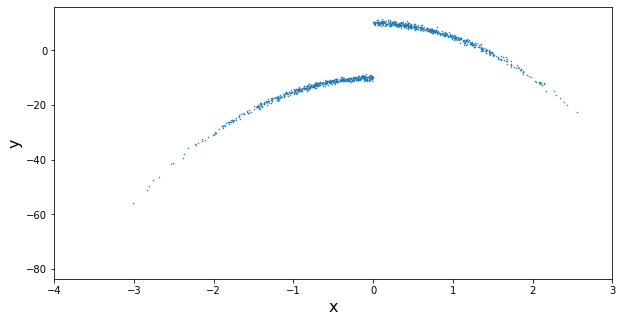

In [2]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s = 0.3)
plt.xlim([-4, 3])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [3]:
p = [np.ones(x.shape),x,x**2,x**3,x**4,np.abs(x),np.sign(x),np.sin(x),np.cos(x),np.exp(x)]

# Find the functions to fit the data using algorithmic approach

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
final_functions = []
all_scores = []

#Get the first function by finding the function that gives highest cross val score alone.
for k in p:
    all_scores.append(sum(cross_val_score(reg,k,y,cv=10))/10)

first_function = p[all_scores.index(max(all_scores))]
final_functions.append(first_function)

#Delete this function from our function list.
first_f_index = all_scores.index(max(all_scores))
print(f"Index of first function in p is : {first_f_index}")
del p[first_f_index]

#Clear previous scores
all_scores.clear()

#Second run to find combination of two functions
for k in p:
    function = np.column_stack((first_function,k))
    all_scores.append(sum(cross_val_score(reg,function,y,cv=10))/10)

second_function = p[all_scores.index(max(all_scores))]
final_functions.append(second_function)
second_f_index = all_scores.index(max(all_scores))
print(f"Index of first function in p is : {second_f_index}")

Index of first function in p is : 6
Index of first function in p is : 2


In [5]:
from sklearn.preprocessing import StandardScaler
x1 = StandardScaler().fit_transform(final_functions[0])
x2 = StandardScaler().fit_transform(final_functions[1])

In [6]:
X = np.column_stack((x1,x2))
X_b = np.c_[np.ones((len(x), 1)), X]
X_b

array([[ 1.        ,  0.98019606, -0.31642014],
       [ 1.        , -1.02020406, -0.58215276],
       [ 1.        , -1.02020406,  1.53509915],
       ...,
       [ 1.        ,  0.98019606, -0.25513491],
       [ 1.        , -1.02020406, -0.61802617],
       [ 1.        ,  0.98019606, -0.37123389]])

In [7]:
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
y_hat = X_b.dot(w_estimate)
#y_hat

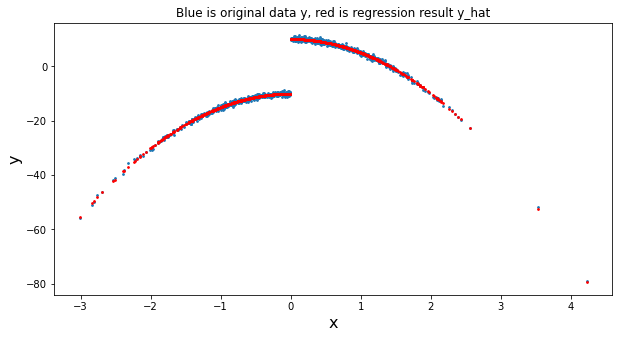

In [9]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s = 3)
plt.scatter(x, y_hat, s = 3, color='red')
plt.title('Blue is original data y, red is regression result y_hat')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

# Find the functions using mathematical approach.

In [10]:
import warnings

warnings.filterwarnings('ignore')

I am using LASSO to find our functions

In [11]:

from sklearn import linear_model
# Find LASSO paths (LASSO coeffections for different alpha values)
n_alphas = 50
lasso_alphas = np.linspace(1e-8, 15, n_alphas)

p = [np.ones(x.shape),x,x**2,x**3,x**4,np.abs(x),np.sign(x),np.sin(x),np.cos(x),np.exp(x)]
X = np.column_stack(p)
print(X.shape)
X_new = StandardScaler().fit_transform(X)

lasso_coefs = []

#I had to increase tolerance from 0.0001 to 0.001 because LASSO did not converge at default tolerance of tol = 0.0001
for a in lasso_alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=True, max_iter=10000,tol = 0.001)
    lasso.fit(X_new, y)
    lasso_coefs.append(lasso.coef_)

(1000, 10)


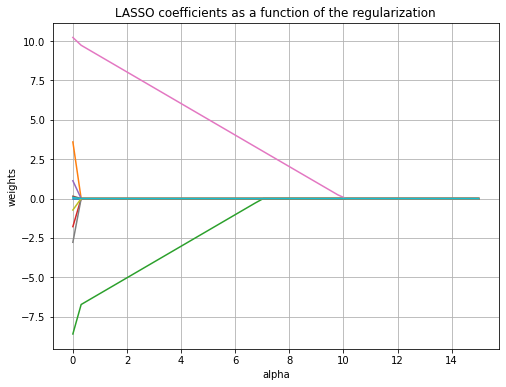

In [12]:
# Show LASSO paths   
plt.figure(2, figsize=(8,6))    
plt.plot(lasso_alphas, lasso_coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('LASSO coefficients as a function of the regularization')
plt.grid()
plt.show()

In [13]:
# LASSO regression for different alpha values
alphas = [0.01, 0.1, 5, 8, 10, 15, 25]
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=True, max_iter=10000)
    lasso.fit(X_new, y)

    print('LASSO coefficients for alpha =', a)
    print(lasso.coef_)
    print()

LASSO coefficients for alpha = 0.01
[ 0.         -0.         -6.94698475 -0.         -0.         -0.07260936
 10.03457436  0.          0.01674076 -0.        ]

LASSO coefficients for alpha = 0.1
[ 0.00000000e+00  0.00000000e+00 -6.90853182e+00  0.00000000e+00
 -0.00000000e+00 -2.73492587e-02  9.94395197e+00  0.00000000e+00
  6.22051425e-03 -0.00000000e+00]

LASSO coefficients for alpha = 5
[ 0.          0.         -2.02848357  0.         -0.         -0.
  5.03286943  0.          0.         -0.        ]

LASSO coefficients for alpha = 8
[ 0.          0.         -0.          0.         -0.         -0.
  2.02839781  0.          0.         -0.        ]

LASSO coefficients for alpha = 10
[ 0.          0.         -0.          0.         -0.         -0.
  0.02839781  0.          0.         -0.        ]

LASSO coefficients for alpha = 15
[ 0.  0. -0.  0. -0. -0.  0.  0.  0. -0.]

LASSO coefficients for alpha = 25
[ 0.  0. -0.  0. -0. -0.  0.  0.  0. -0.]

